In [28]:
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [29]:
from methods_kmeans import Modeling_KMeans
methods = Modeling_KMeans()

In [30]:
df_scaled = methods.import_df('df_scaled')
df_scaled.set_index('country',inplace=True)

In [31]:
df_scaled

,Unnamed: 0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Afghanistan,0,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962
Albania,1,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736
Algeria,2,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523
Angola,3,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329
Antigua and Barbuda,4,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,162,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922
Venezuela,163,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332
Vietnam,164,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607


In [32]:
df_scaled.drop(columns='Unnamed: 0',inplace=True)

##### Quantidade de clusters ideal verificada pelo método do cotovelo

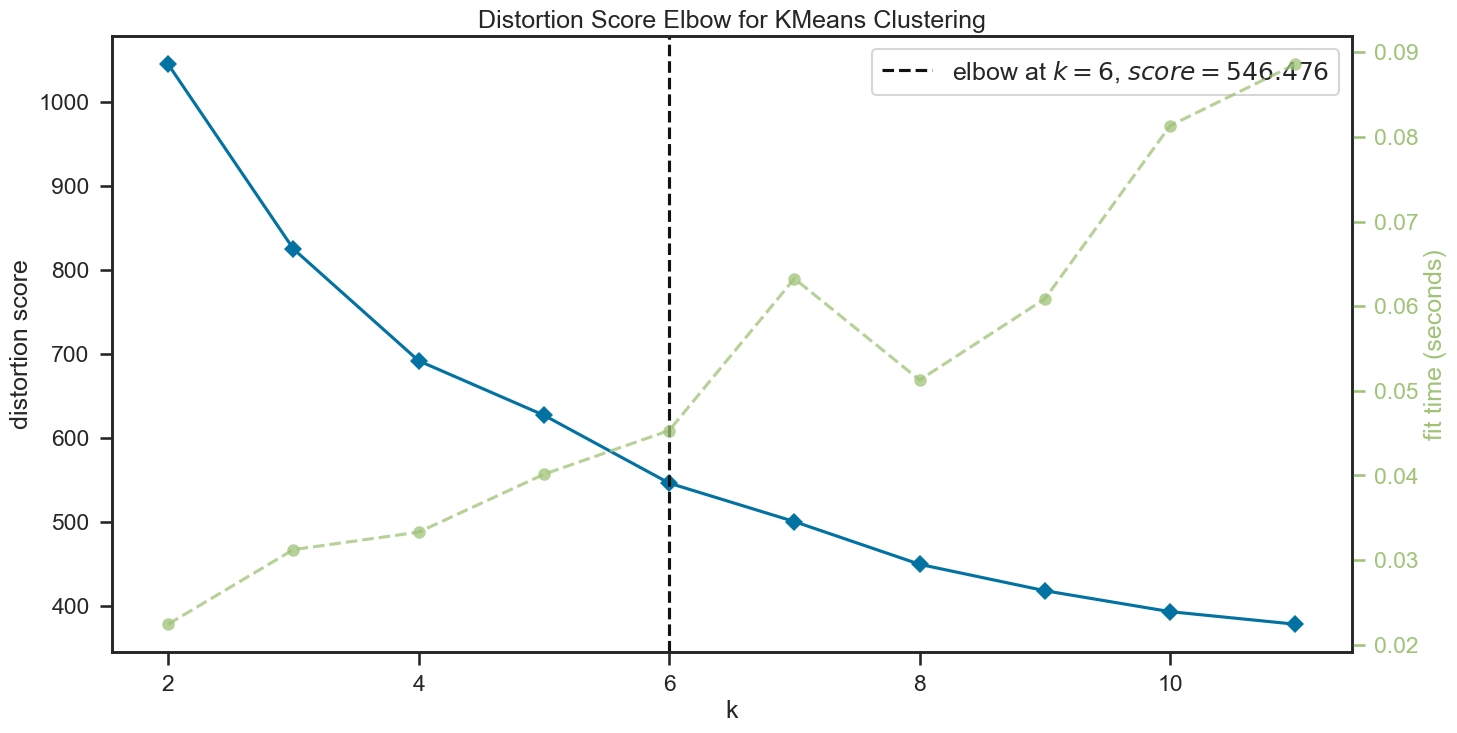

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
methods.ideal_clusters(df_scaled, KMeans())

Veja que o método do cotovelo mostra que 6 clusters é o ideal para este tratamento, será feito para 3 clusters, conforme foi pedido.

In [34]:
cluster_kmeans = methods.clustering_kmeans(df_scaled, 3)
df_scaled['cluster_kmeans'] = cluster_kmeans
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
country,,,,,,,,,,
Afghanistan,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962,0
Albania,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736,1
Algeria,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523,1
Angola,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329,0
Antigua and Barbuda,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922,1
Venezuela,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332,1
Vietnam,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607,1


In [35]:
methods.count_clusters(df_scaled, 'cluster_kmeans')

Quantidade de países do cluster 1 é 83.
Quantidade de países do cluster 0 é 47.
Quantidade de países do cluster 2 é 36.


In [36]:
methods.metrics_model(df_scaled, 3)

*********************************************
Índice de Davies-Bouldin: 1.216090192309193


In [37]:
df_scaled.reset_index(inplace=True)


********************************************************************************
A quantidade de países no CLUSTER 0 é 47 e são eles: 

 ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
********************************************************************************
Estatísticas descritivas do CLUSTER 0

********************************************************************************
       child_mort    exports     health    imports     income  inflation  \
count   47.000000 

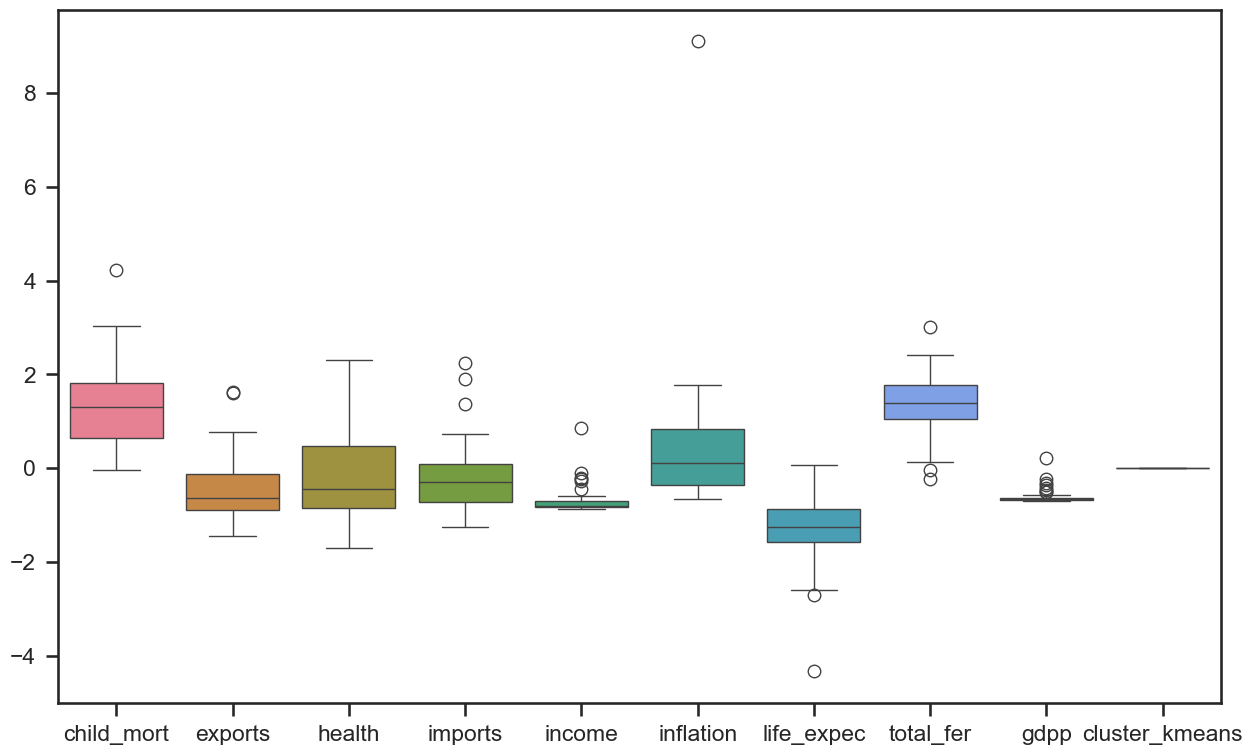

********************************************************************************
A quantidade de países no CLUSTER 1 é 83 e são eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Sri Lanka', 'St. Vince

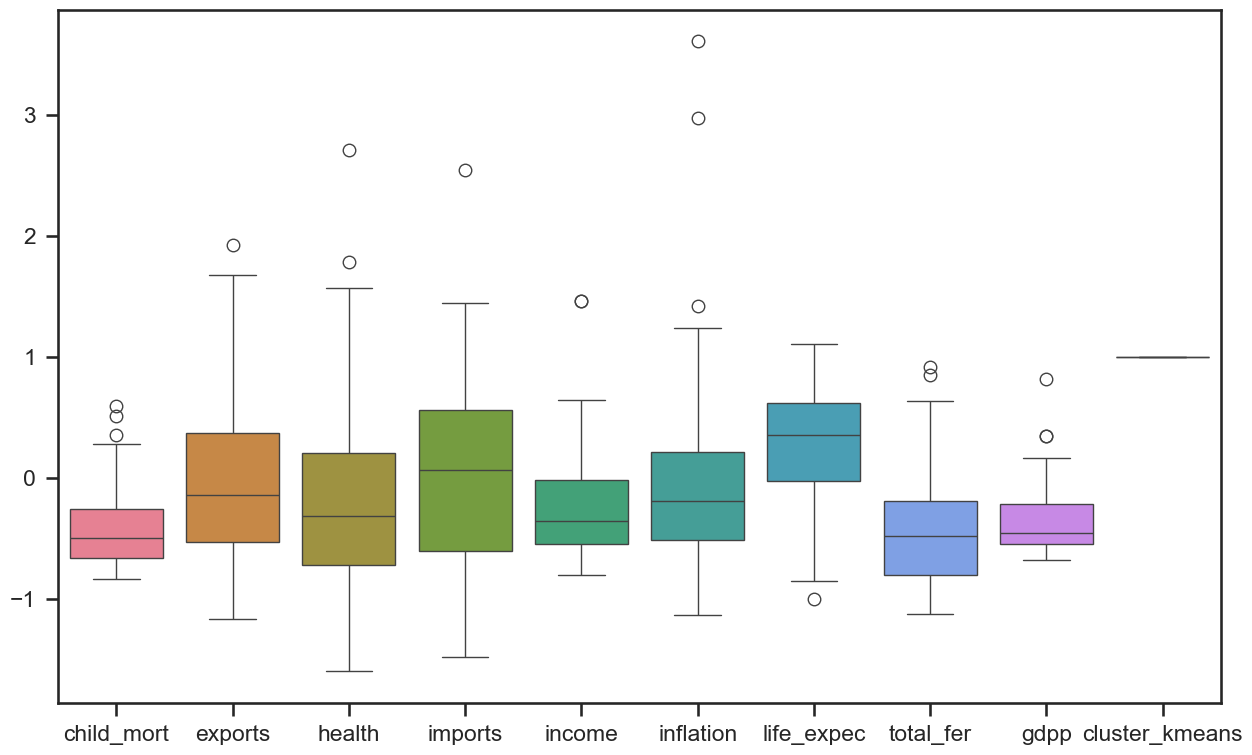

********************************************************************************
A quantidade de países no CLUSTER 2 é 36 e são eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
********************************************************************************
Estatísticas descritivas do CLUSTER 2

********************************************************************************
       child_mort    exports     health    imports     income  inflation  \
count   36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean    -0.822111   0.638478   0.721439   0.180473   1.477770  -0.

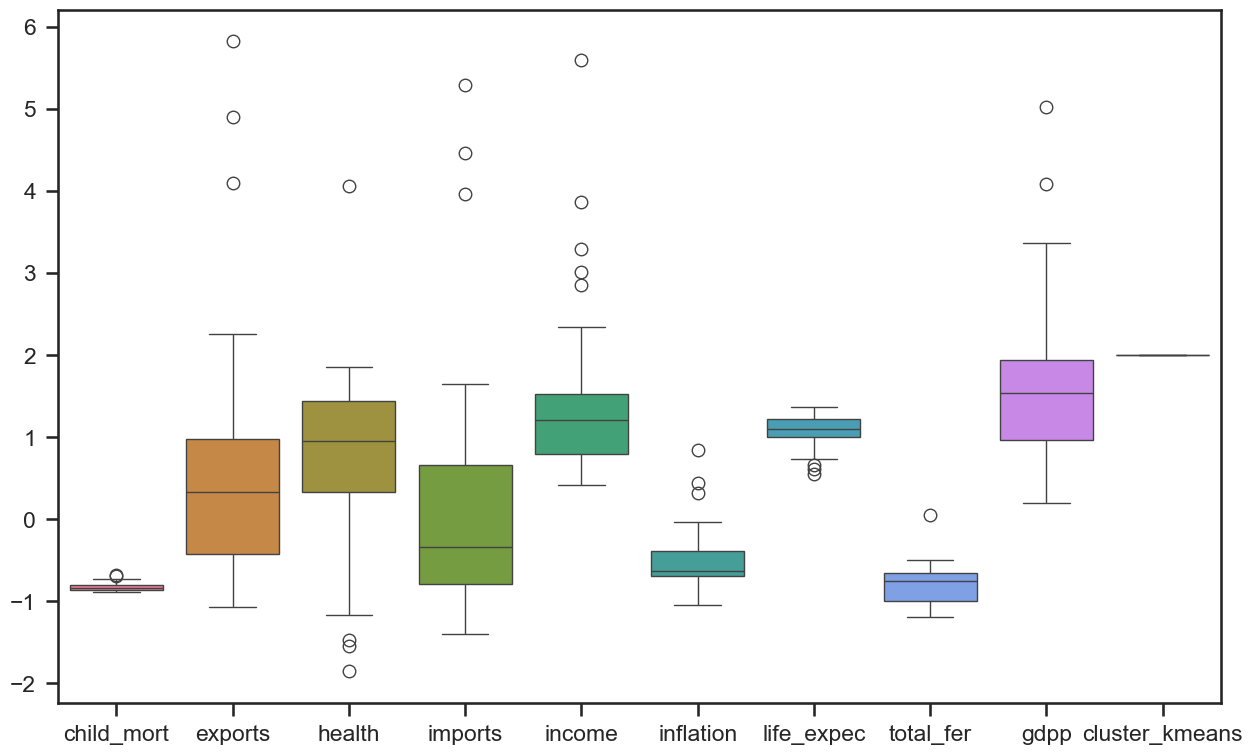

In [38]:
methods.report_clustering(df_scaled, 'cluster_kmeans')

Foi mostrado em Data Preparation (_heatmap_) que há forte correlação entre algumas variáveis, o que pode produzir enviesamento nos resultados. Para isso será aplicado uma PCA que não ofereça perda significativa. Além disso, vou me basear num intervalo de confiança de 95.44% e usar 6 componentes para ver qual o percentual da base que o método vai representar.

In [39]:
df_pca = methods.pca_method(df_scaled.drop(columns='country'), 6)

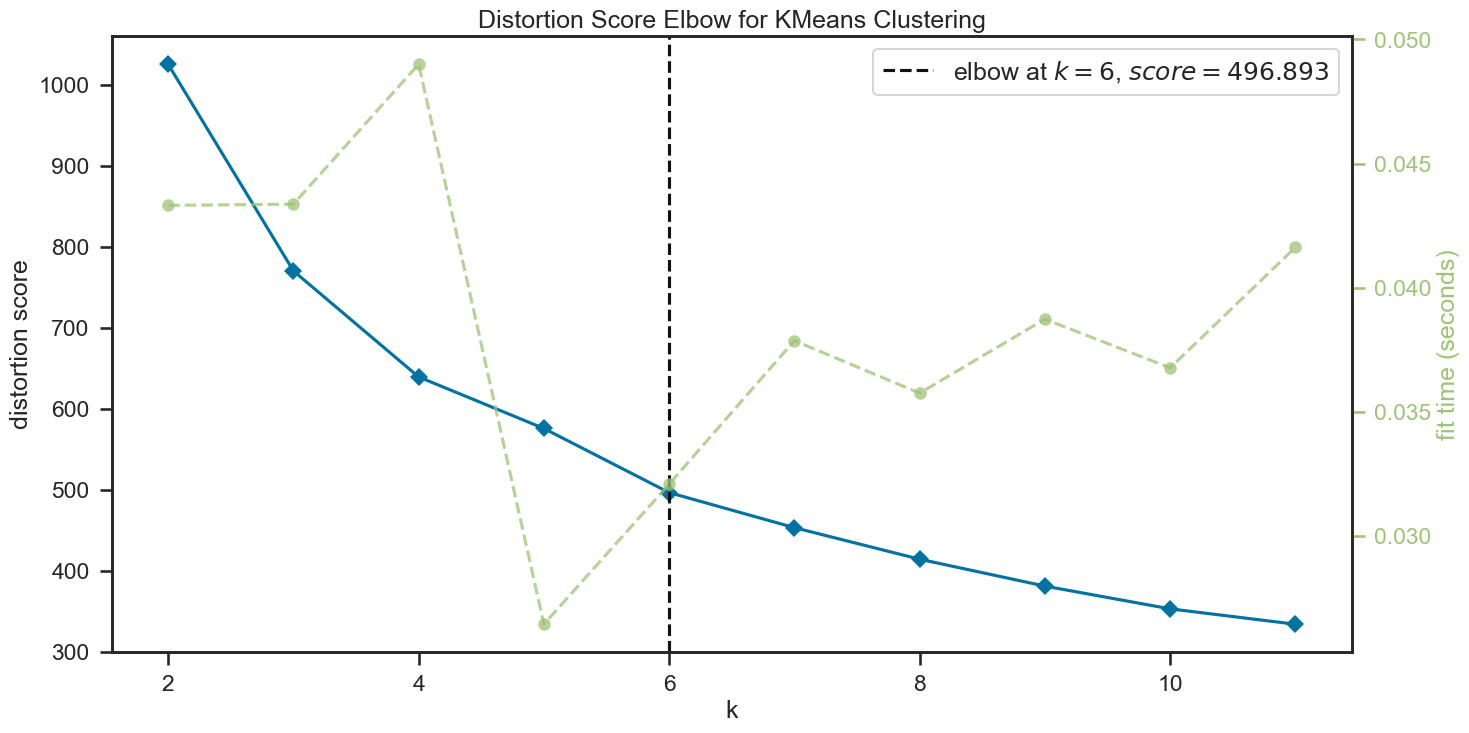

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
methods.ideal_clusters(df_pca, KMeans())

(<Figure size 800x550 with 2 Axes>, <Axes: >, <Axes: >)

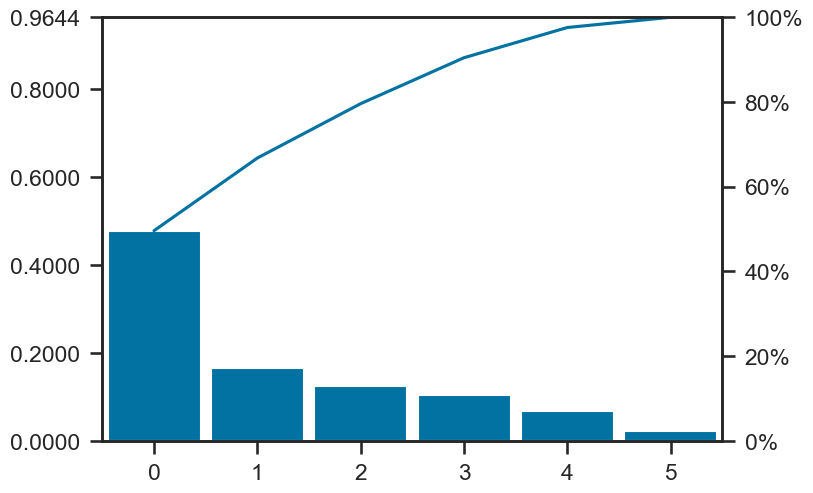

In [41]:
methods.pca_(df_scaled.drop(columns='country'), 6)

Veja que a escolha por 6 componentes é bem representativ, tendo em vista o intervalo de confiança assumido anteriormente.

In [42]:
cluster_kmeans_pca = methods.clustering_kmeans(df_pca, 3)
df_pca['cluster_kmeans_pca'] = cluster_kmeans_pca
df_pca

,0,1,2,3,4,5,cluster_kmeans_pca
0,-3.073570,-0.010641,-0.682201,0.996707,-0.154684,-0.244455,0
1,0.429966,-0.556350,-0.340574,-1.176255,0.138592,0.088654,1
2,-0.246672,-0.448076,1.232765,-0.909188,0.109600,-0.385228,1
3,-3.107217,1.622973,1.546863,0.840717,-0.264977,-0.539780,0
4,0.991359,0.194302,-0.245338,-0.839239,-0.216293,-0.204701,1
...,...,...,...,...,...,...,...
161,-0.782426,0.599256,-0.380284,-0.692536,-0.411062,0.035246,1
162,-0.479933,-1.254072,3.131348,-0.236883,2.032545,0.093030,1
163,0.461126,1.410802,-0.266237,-1.062672,1.170442,0.037289,1
164,-2.084393,-0.124504,1.123017,0.009925,0.584907,-0.544191,0


In [43]:
methods.count_clusters(df_pca,'cluster_kmeans_pca')

Quantidade de países do cluster 1 é 83.
Quantidade de países do cluster 0 é 47.
Quantidade de países do cluster 2 é 36.


In [44]:
methods.metrics_model(df_pca.drop(columns='cluster_kmeans_pca'), 3)

*********************************************
Índice de Davies-Bouldin: 1.1658110064039517


In [45]:
df_pca['country'] = df_scaled['country']

********************************************************************************
A quantidade de países no CLUSTER 0 é 47 e são eles: 

 ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
********************************************************************************
Estatísticas descritivas do CLUSTER 0

********************************************************************************
               0          1          2          3          4          5  \
count  47.000000  4

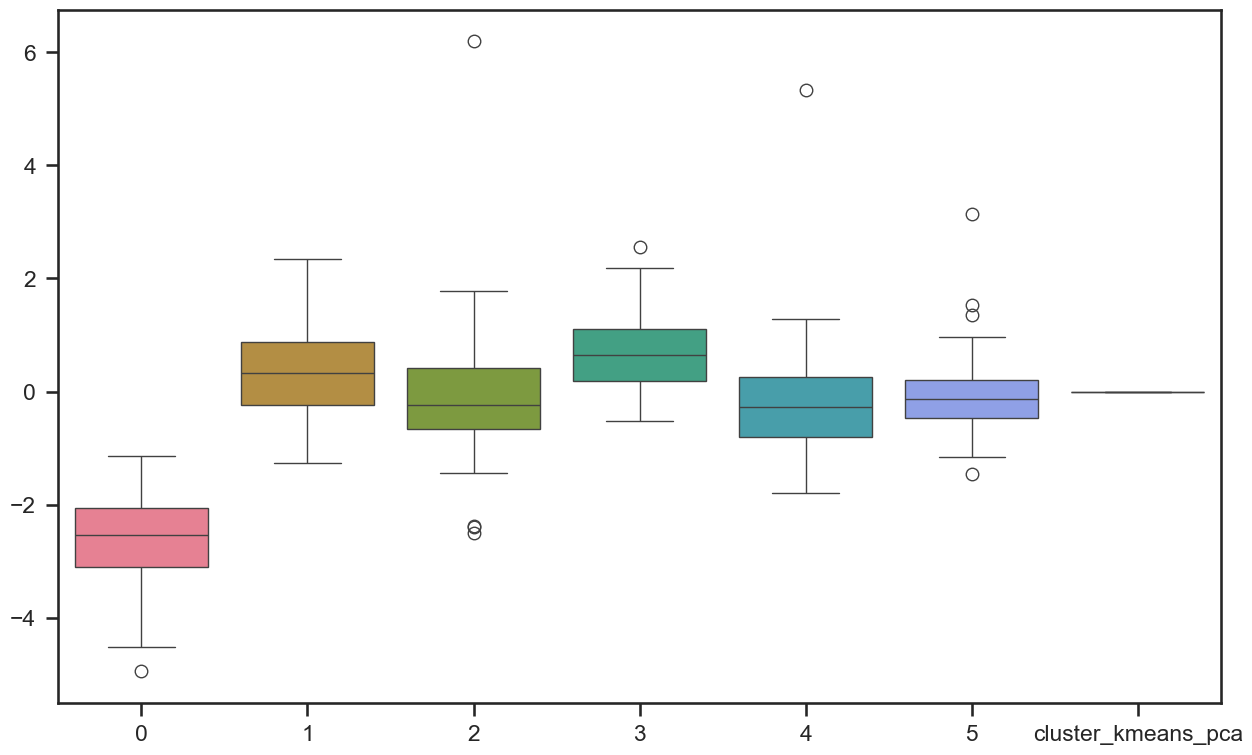

********************************************************************************
A quantidade de países no CLUSTER 1 é 83 e são eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Sri Lanka', 'St. Vince

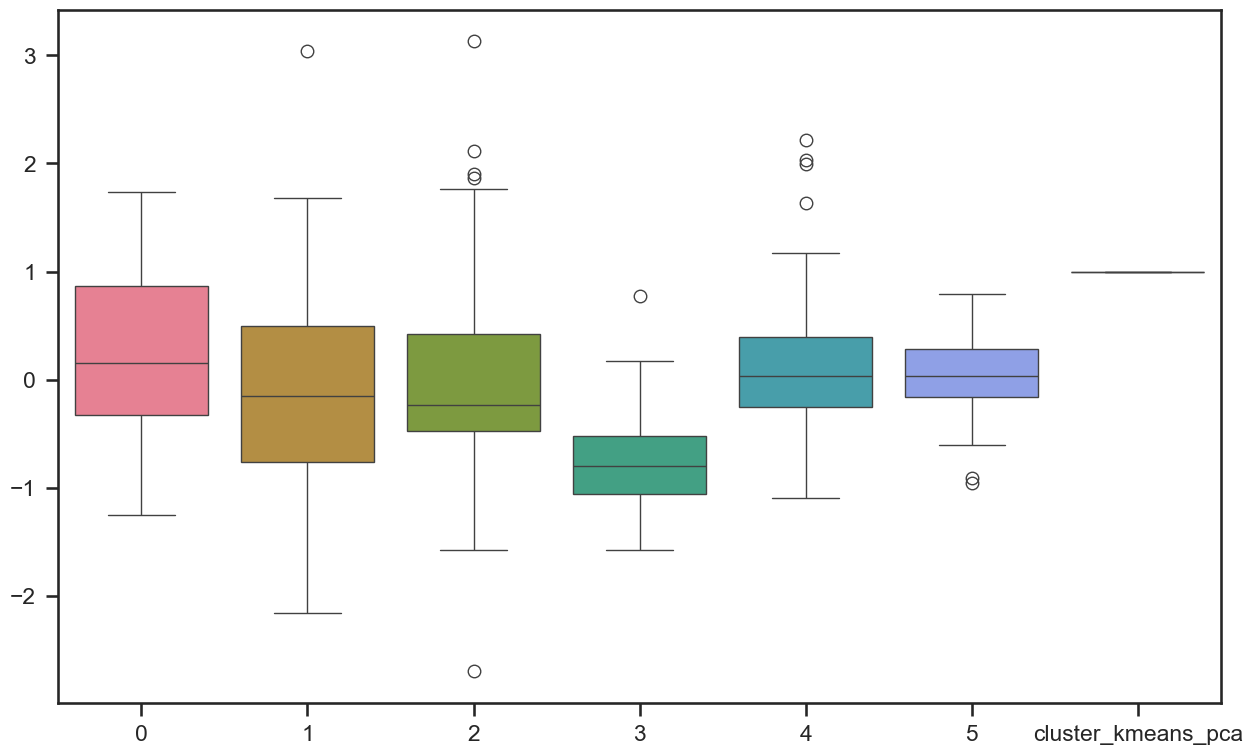

********************************************************************************
A quantidade de países no CLUSTER 2 é 36 e são eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
********************************************************************************
Estatísticas descritivas do CLUSTER 2

********************************************************************************
               0          1          2          3          4          5  \
count  36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean    2.951208  -0.200831   0.073750   0.866935  -0.160346  -0.025

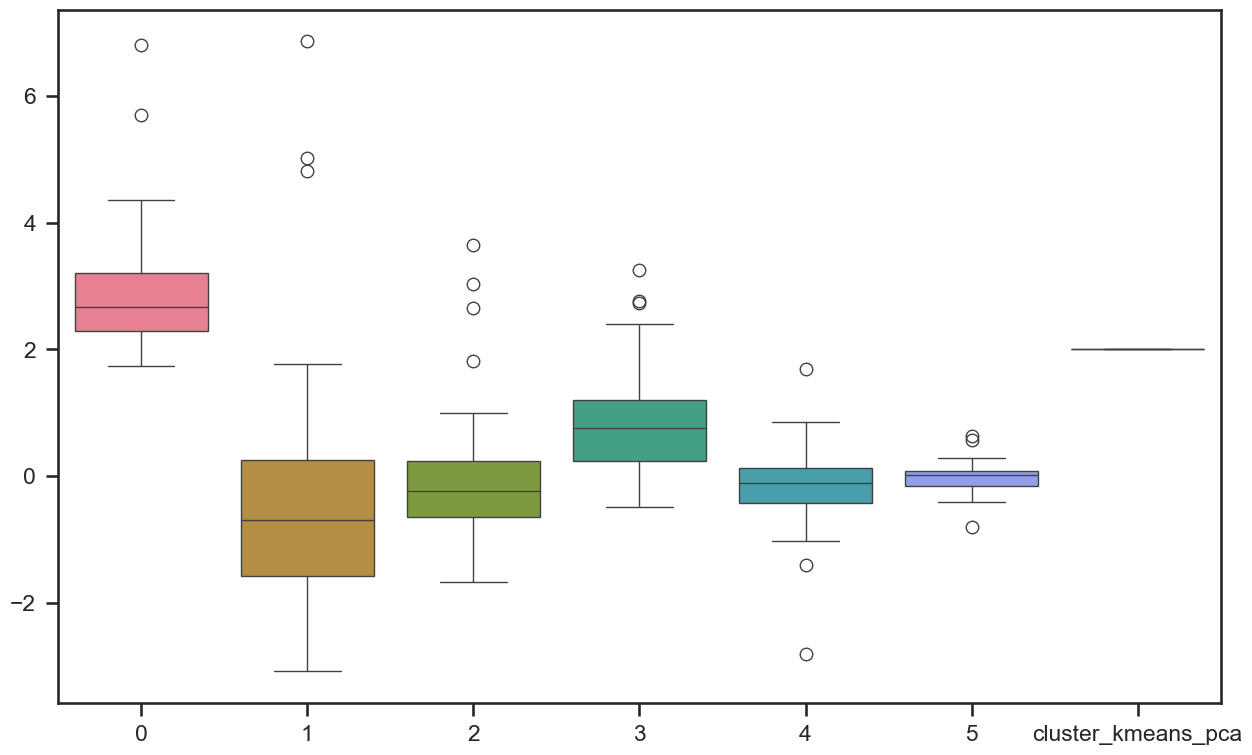

In [46]:
methods.report_clustering(df_pca, 'cluster_kmeans_pca')

## Determinando o país que melhor representa seu cluster

**O país que melhor representa o cluster é aquele que está mais próximo do centróide.**

In [47]:
df_best_point = df_scaled.set_index('country')

In [48]:
methods.best_point_numpy(df_best_point, 'cluster_kmeans', 3)

O país com melhor ponto médio do cluster 0 é: TANZANIA
O país com melhor ponto médio do cluster 1 é: TUNISIA
O país com melhor ponto médio do cluster 2 é: FINLAND


### Conferindo o resultado pelo Scipy

In [49]:
methods.best_point_scipy(df_best_point, 'cluster_kmeans', 3)

O país com melhor ponto médio do cluster 0 é: TANZANIA - Distância: 102.73238192691963
O país com melhor ponto médio do cluster 1 é: TUNISIA - Distância: 146.6169148788656
O país com melhor ponto médio do cluster 2 é: FINLAND - Distância: 85.98252472701641


## Usando PCA

In [50]:
df_best_point_pca = df_pca.set_index('country')

In [51]:
methods.best_point_numpy(df_best_point_pca, 'cluster_kmeans_pca', 3)

O país com melhor ponto médio do cluster 0 é: TANZANIA
O país com melhor ponto médio do cluster 1 é: SURINAME
O país com melhor ponto médio do cluster 2 é: FINLAND


### Conferindo o resultado pelo Scipy

In [52]:
methods.best_point_scipy(df_best_point_pca, 'cluster_kmeans_pca', 3)

O país com melhor ponto médio do cluster 0 é: TANZANIA - Distância: 95.45737179456621
O país com melhor ponto médio do cluster 1 é: SURINAME - Distância: 133.05516558350786
O país com melhor ponto médio do cluster 2 é: FINLAND - Distância: 82.82079414222461


## Medóides

## Sem PCA

In [53]:
methods.medoids_sklearn(df_best_point, 'cluster_kmeans')

O medóide do cluster 0 é: TANZANIA
O medóide do cluster 1 é: TUNISIA
O medóide do cluster 2 é: FINLAND


## Usando PCA

In [54]:
methods.medoids_sklearn(df_best_point_pca, 'cluster_kmeans_pca')

O medóide do cluster 0 é: TANZANIA
O medóide do cluster 1 é: SURINAME
O medóide do cluster 2 é: FINLAND
